In [1]:
# Step 0. Run the necessary imports.
import cv2
(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

In [6]:
# Step 1. Prepare video
videofile = '../Data/cars.mp4'
vcap = cv2.VideoCapture(videofile)
read_success, frame = vcap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

In [7]:
# Step 2. Set up tracker
# Select trecker
tracker_types = ['MIL', 'KCF', 'CSRT']
tracker_type = tracker_types[0]

if int(minor_ver) < 3:
    tracker = cv2.Tracker_create(tracker_type)
else:
    if tracker_type == 'MIL':
        tracker = cv2.TrackerMIL_create()
    if tracker_type == 'KCF':
        tracker = cv2.TrackerKCF_create()
    if tracker_type == "CSRT":
        tracker = cv2.TrackerCSRT_create()

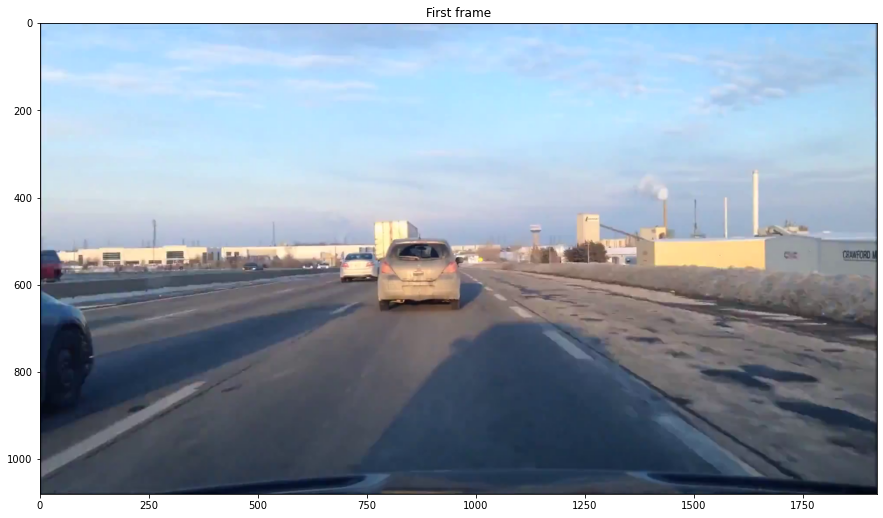

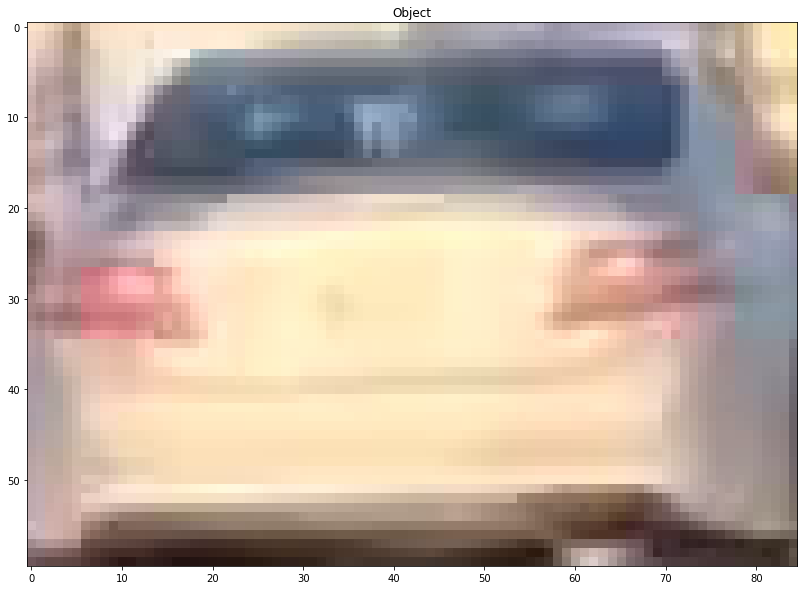

In [8]:
# Step 3
# Genrate tracking template
plt.figure()
plt.imshow(frame)
plt.title('First frame')

x1, y1, width, height = 690, 525, 85, 60

obj = frame[y1:y1+height, x1:x1+width]
plt.figure()
plt.imshow(obj)
plt.title('Object')

# Initialize tracker
bbox = (x1, y1, width, height)
ok = tracker.init(frame, bbox)

True (717, 530, 85, 60)


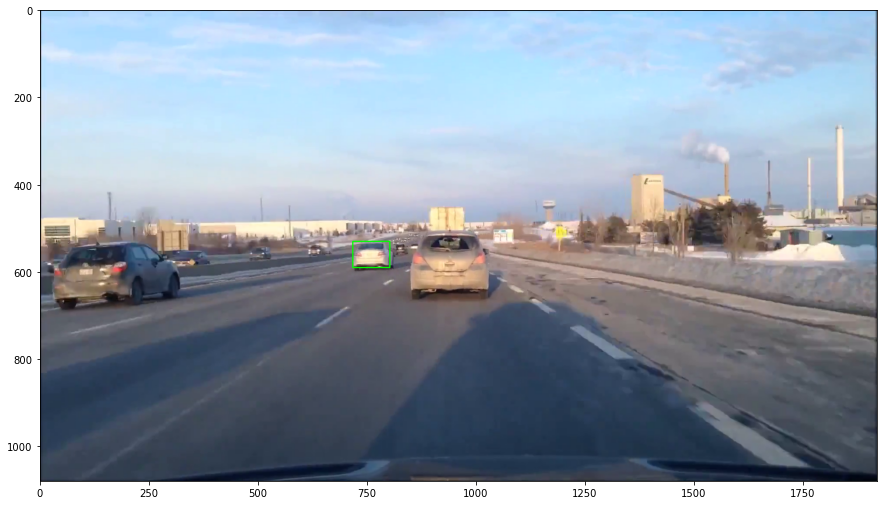

/tmp/ipykernel_198470/2092704871.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.waitforbuttonpress(0.1)


True (726, 531, 85, 60)


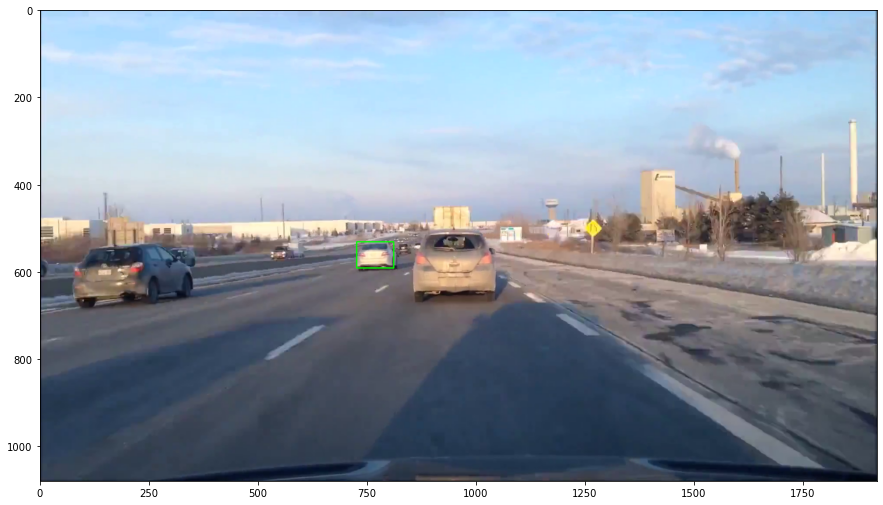

True (728, 507, 85, 60)


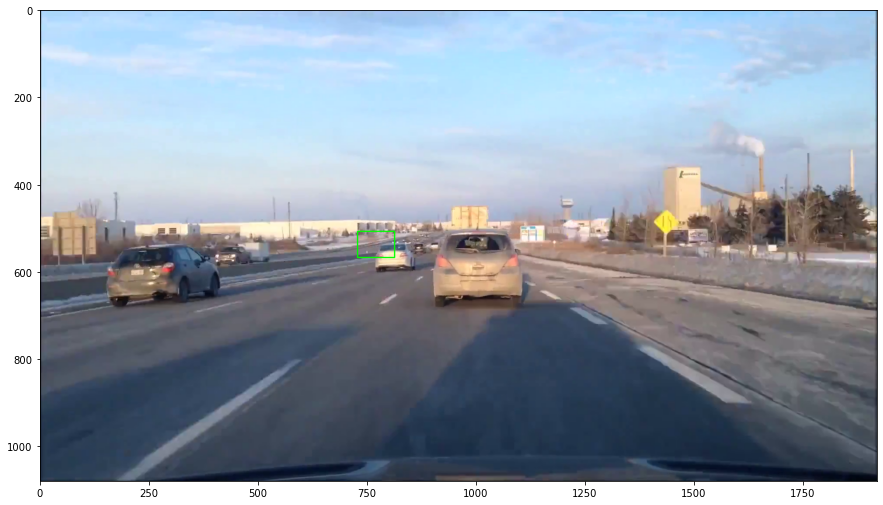

True (741, 504, 85, 60)


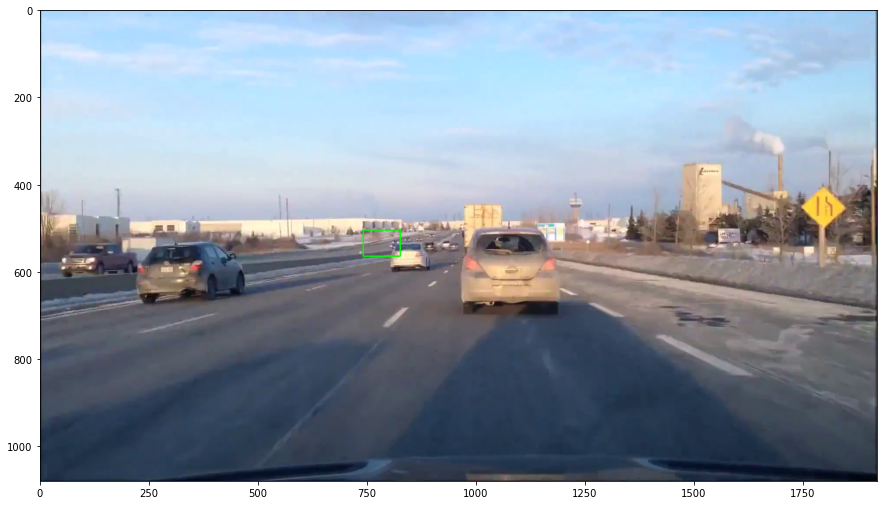

True (758, 502, 85, 60)


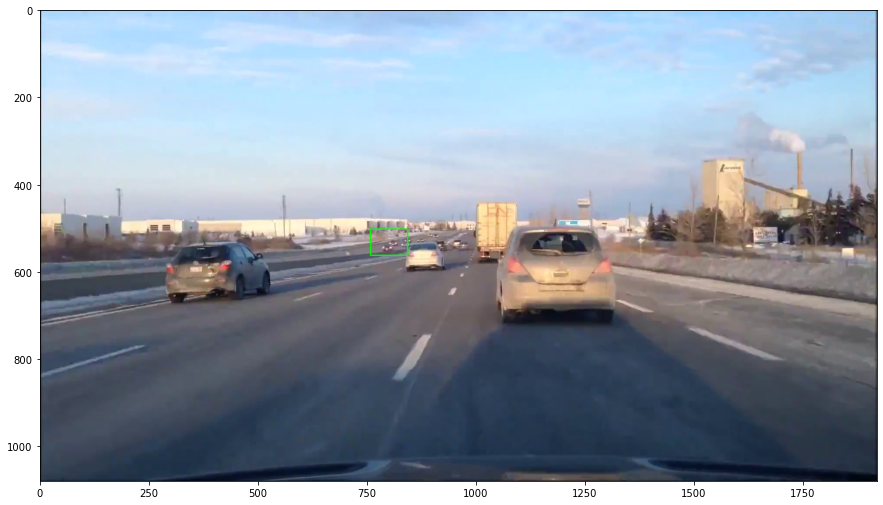

True (751, 491, 85, 60)


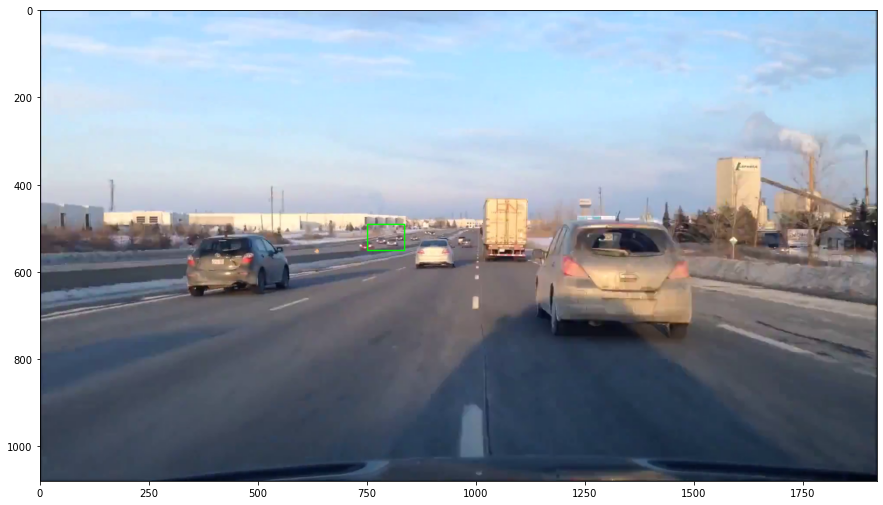

True (733, 491, 85, 60)


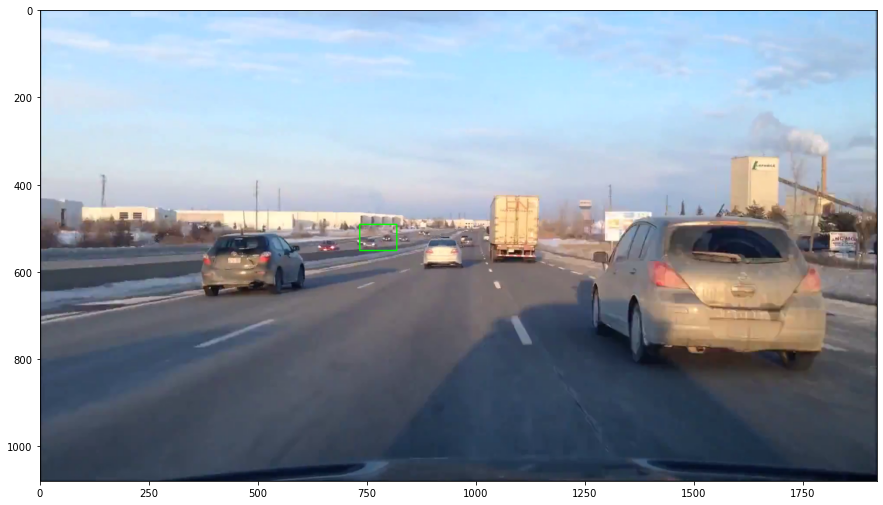

True (750, 477, 85, 60)


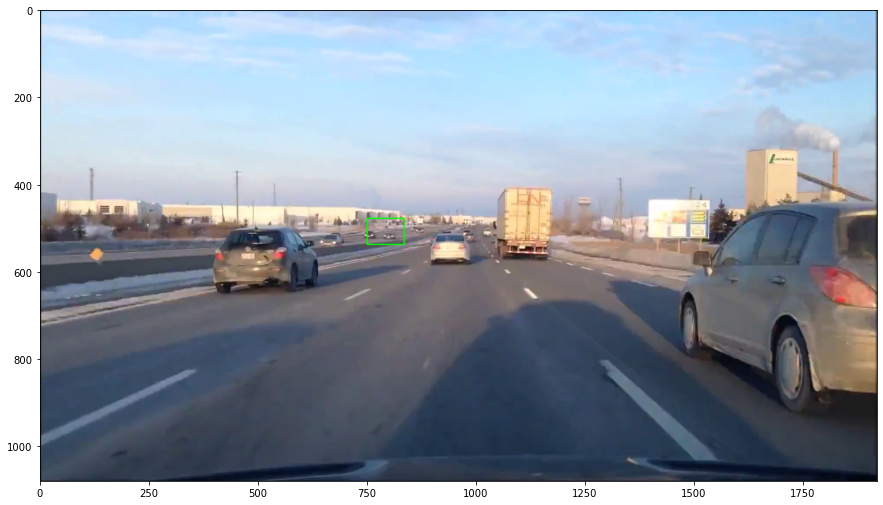

True (768, 473, 85, 60)


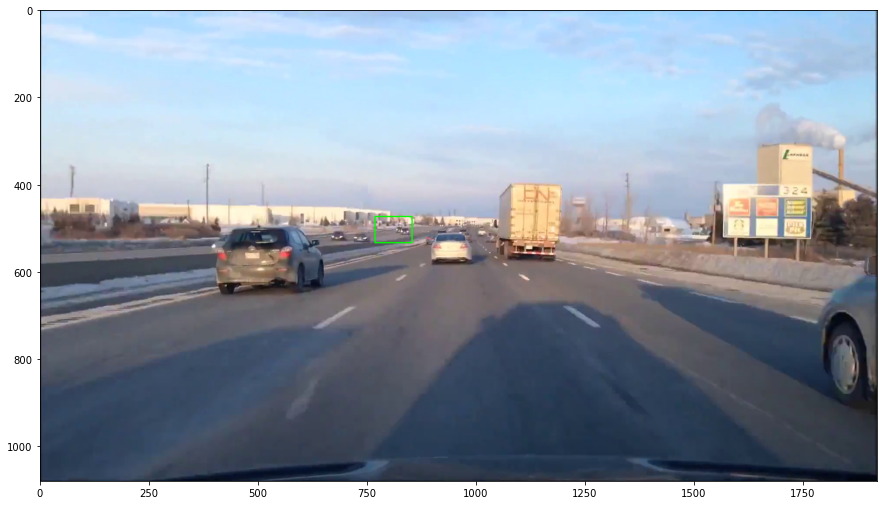

True (785, 465, 85, 60)


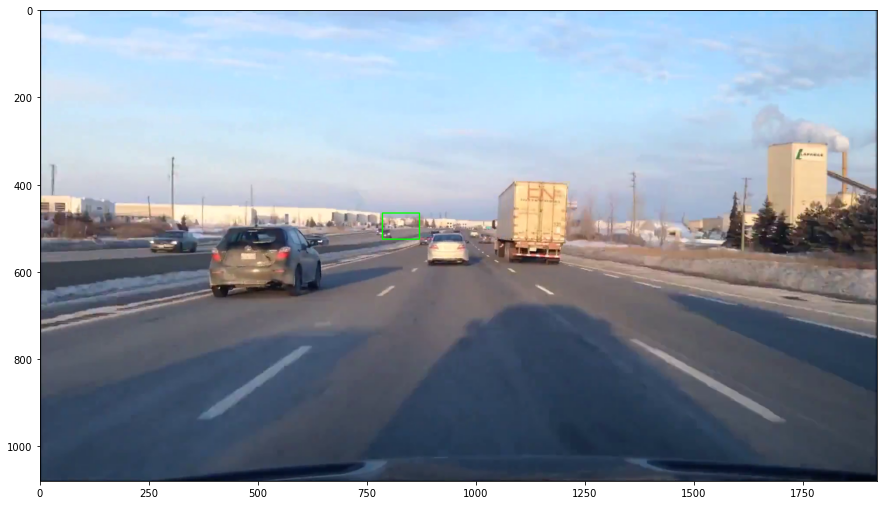

True (766, 454, 85, 60)


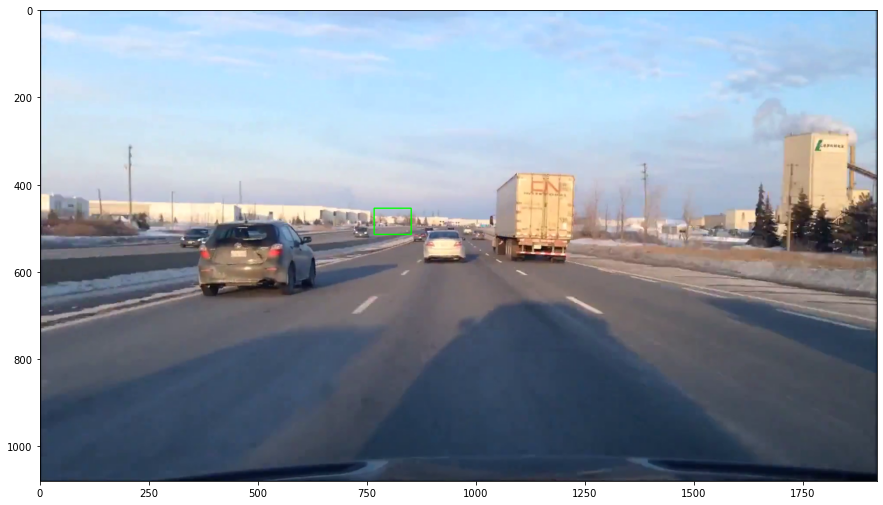

True (756, 466, 85, 60)


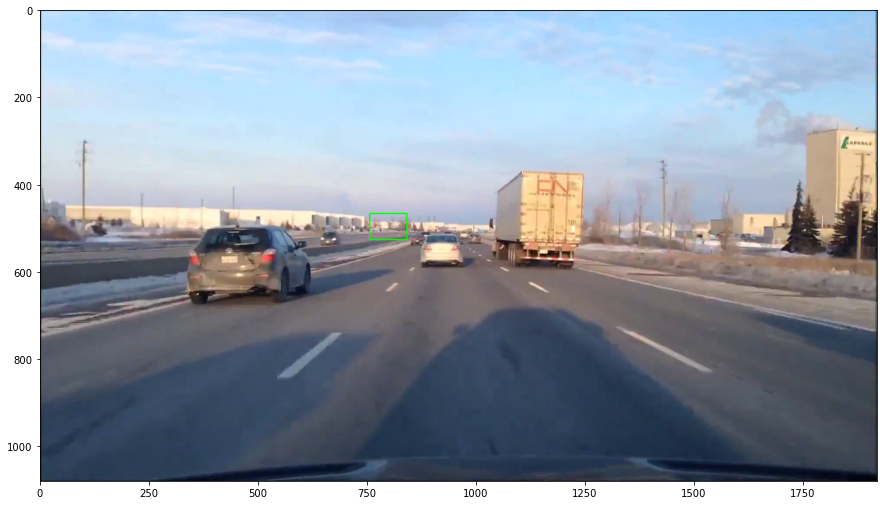

True (744, 463, 85, 60)


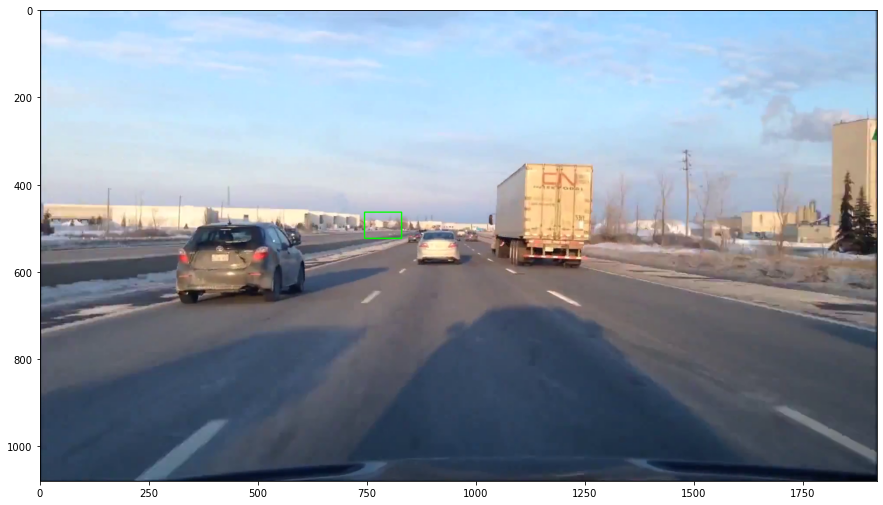

True (745, 472, 85, 60)


In [ ]:
# Step 4 and 5 
# Tracking loop
current_frame_number, frame_count = 1, 15
while read_success and current_frame_number < frame_count:
    read_success, frame = vcap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    
        
    ok, bbox = tracker.update(frame)
    print(ok, bbox)
            
    # Show the tracker working
    x1, y1 = bbox[0], bbox[1]
    width, height = bbox[2], bbox[3]
    cv2.rectangle(frame, (x1, y1), (x1+width, y1+height), (0, 255, 0), 2)
    plt.imshow(frame)
    plt.show(), plt.draw()    
    plt.waitforbuttonpress(0.1)
    plt.clf()
    
    current_frame_number += 1

**# Step 6**

Results comparison:

'MIL' – correctly detected the object only for the first few frames. As soon as the object abruptly changed its position (moved to the right by ~50 pixels), the detector lost it. However, until the end of the video, the status of the detector was TRUE, although it tracked "garbage", and in the middle of the video it caught a cloud and tracked it for quite some time.

'KCF' - lost object at the same moment as MIL, but changed its status to FALSE and did not give false positive results until the end of the video. This behavior is better than that of MIL in my opinion.

'CSRT' - This detector tracked the object very well. Adapted to changing the position and size of the object. It is robust to a slight overlap of an object by another object in time (up to ~10 frames). Lost objects when it was overlap by another for ~20+ frames. After losing the object and several frames of false positive detection, it changed its status to FALSE. **Best result in my opinion**.